<font size=6><b> lec08.불균형 데이터   

* ref : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
# ! pip install imbalanced-learn
# from imblearn.over_sampling import SMOTE

In [2]:
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#------------------------------------------------------------------ 학습데이터셋
from sklearn.model_selection import train_test_split

#------------------------------------------------------------------ 분류모델
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier

#------------------------------------------------------------------ 평가관련
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import plot_roc_curve
# plot_roc_curve(model, X, y)
# plt.show()
from sklearn.metrics import auc
# auc(fpr, tpr)
from sklearn.preprocessing import Binarizer
# bb = Binarizer(threshold=1.1)                     
# print(bb.fit_transform(temp))

#------------------------------------------------------------------ 데이터증강
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings(action='ignore')
sns.set()

# Data Load

In [5]:
df = pd.read_csv('./dataset/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

0    284315
1       492
Name: Class, dtype: int64


<AxesSubplot:>

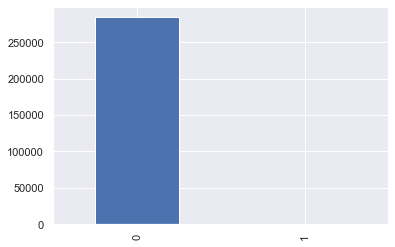

In [7]:
print( df['Class'].value_counts()  )
df['Class'].value_counts().plot.bar()

# 원본 불균형 학습 & 평가

In [8]:
y = df['Class']
X = df.drop(['Class'], axis=1)

X_train,X_test,y_train,y_test = train_test_split(X, y , test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(  confusion_matrix(y_test,  pred)   )
print(f"정확도: {accuracy_score(y_test, pred):.4f}, 정밀도: {precision_score(y_test, pred):.4f}, 재현율: {recall_score(y_test, pred):.4f}, F1: {f1_score(y_test, pred):.4f}")
   
    

[[56840    29]
 [   25    68]]
정확도: 0.9991, 정밀도: 0.7010, 재현율: 0.7312, F1: 0.7158


# 데이터 샘플링 축소
* 차트 확인용
* Negative (0) 데이터만 800개로 축소
* Positive (1) 데이터는  82개 그데로 사용

In [9]:
df0 = df[df['Class']==0].sample(n=800, random_state=1111)
df1 = df[df['Class']==1].sample(n=40, random_state=1111)
print(df0.shape)
print(df1.shape)

df01 = pd.concat([df0, df1], axis=0)
print(df01.shape)

(800, 31)
(40, 31)
(840, 31)


0    800
1     40
Name: Class, dtype: int64


<AxesSubplot:>

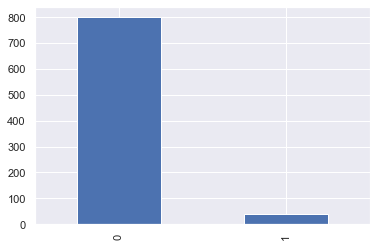

In [10]:
print( df01['Class'].value_counts()  )
df01['Class'].value_counts().plot.bar()

In [11]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 111002 to 147605
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    840 non-null    float64
 1   V1      840 non-null    float64
 2   V2      840 non-null    float64
 3   V3      840 non-null    float64
 4   V4      840 non-null    float64
 5   V5      840 non-null    float64
 6   V6      840 non-null    float64
 7   V7      840 non-null    float64
 8   V8      840 non-null    float64
 9   V9      840 non-null    float64
 10  V10     840 non-null    float64
 11  V11     840 non-null    float64
 12  V12     840 non-null    float64
 13  V13     840 non-null    float64
 14  V14     840 non-null    float64
 15  V15     840 non-null    float64
 16  V16     840 non-null    float64
 17  V17     840 non-null    float64
 18  V18     840 non-null    float64
 19  V19     840 non-null    float64
 20  V20     840 non-null    float64
 21  V21     840 non-null    float64

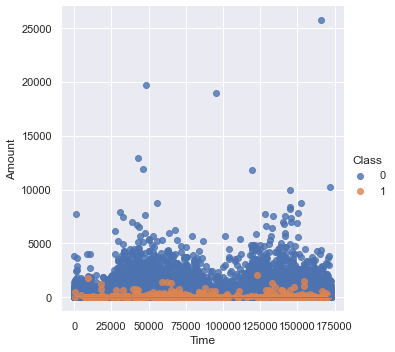

In [12]:
sns.lmplot(x='Time', y='Amount', data=df, hue="Class")

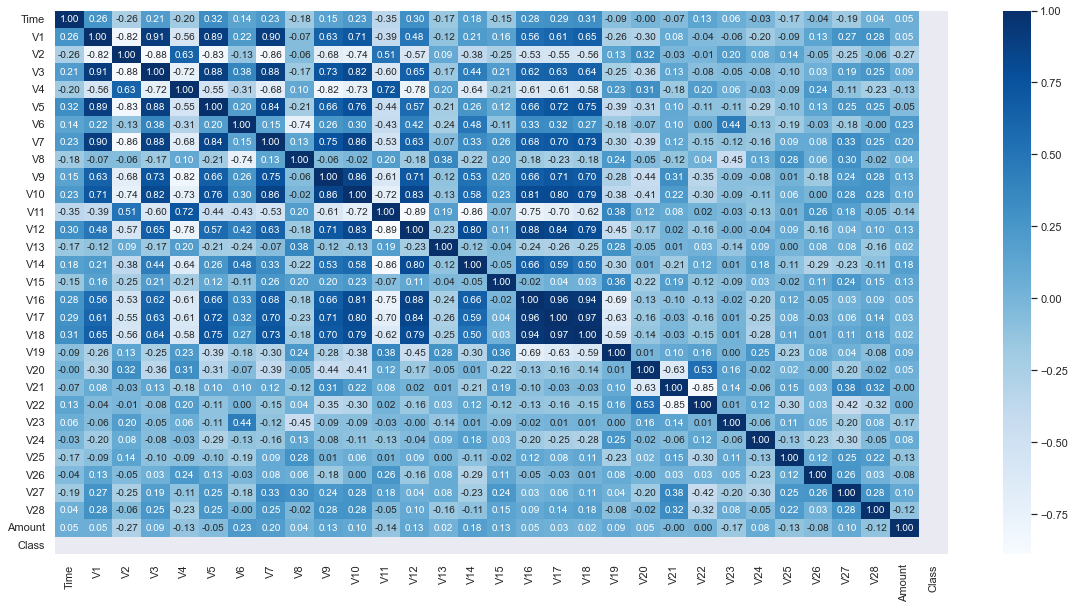

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df[df['Class']==1].corr(), fmt='.2f', annot=True, cmap='Blues')
plt.show()

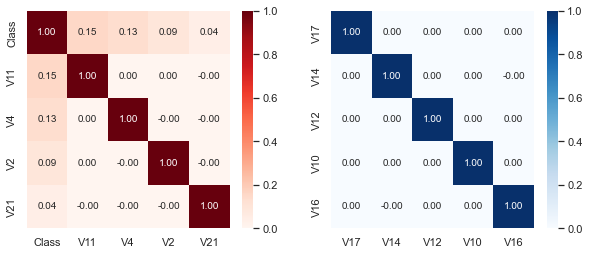

In [14]:
large_idx = df.corr().nlargest(5, 'Class').index
small_idx = df.corr().nsmallest(5, 'Class').index

fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.heatmap(df[large_idx].corr(), fmt='.2f', annot=True, cmap='Reds'  , ax=axes[0])
sns.heatmap(df[small_idx].corr(), fmt='.2f', annot=True, cmap='Blues', ax=axes[1])
plt.show()

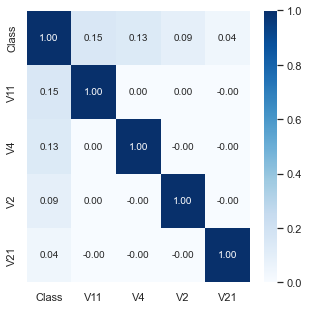

In [15]:
plt.figure(figsize=(5,5))
idx = df.corr().nlargest(5,'Class').index
sns.heatmap(df[idx].corr().nlargest(5,'Class'), fmt='.2f', annot=True, cmap='Blues')
plt.show()

* 연습
* outlier

# 데이터 증강

In [16]:
smt = SMOTE()
X_smote, y_smote = smt.fit_resample(X, y)

In [17]:
X_smote.shape, y_smote.shape

((568630, 30), (568630,))

In [18]:
temp = X_smote.copy()
temp['Class'] = y_smote
temp.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


(568630, 31)
0    284315
1    284315
Name: Class, dtype: int64


<AxesSubplot:>

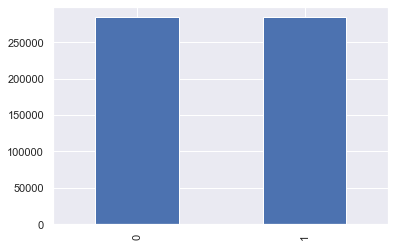

In [19]:
print(temp.shape)
print( temp['Class'].value_counts()  )
temp['Class'].value_counts().plot.bar()

# SMOTE 증강 후 학습 & 평가

In [20]:
# X_train,X_test,y_train,y_test = train_test_split(X, y , test_size=0.2)
X_train,X_test,y_train,y_test = train_test_split(X_smote, y_smote , test_size=0.2)



model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(  confusion_matrix(y_test,  pred)   )
print(f"정확도: {accuracy_score(y_test, pred):.4f}, 정밀도: {precision_score(y_test, pred):.4f}, 재현율: {recall_score(y_test, pred):.4f}, F1: {f1_score(y_test, pred):.4f}")
   
    

[[55760   950]
 [ 1981 55035]]
정확도: 0.9742, 정밀도: 0.9830, 재현율: 0.9653, F1: 0.9741


* 증강 전 original 점수

<pre>
[[56839    31]
 [   33    59]]
정확도: 0.9989, 정밀도: 0.6556, 재현율: 0.6413, F1: 0.6484

In [21]:
 # 불균형 하지 않은 데이터에 smote하면 overfit 돼서 점수낮아짐 (불균형의 비율은 한자리인 기준.. 91 : 9 같이)